In [1]:
from ipywidgets import interact
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
path = './img/railway/vlcsnap-2022-03-22-21h05m32s247.png'
#path = './img/railway/test.jpg'

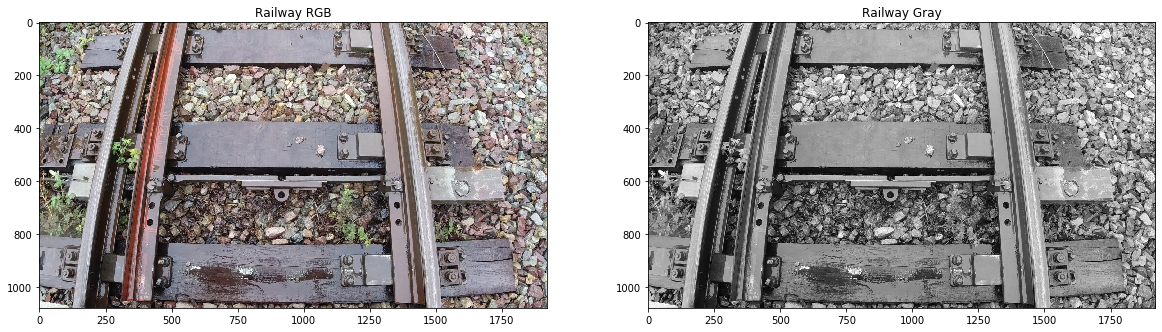

In [2]:
img = cv2.imread(path)
rgbImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #color correction
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #greyscale 

plt.subplot(121),plt.imshow(rgbImg),plt.title('Railway RGB')
plt.subplot(122),plt.title('Railway Gray'),plt.imshow(img_gray,plt.get_cmap('gray'))
plt.show()

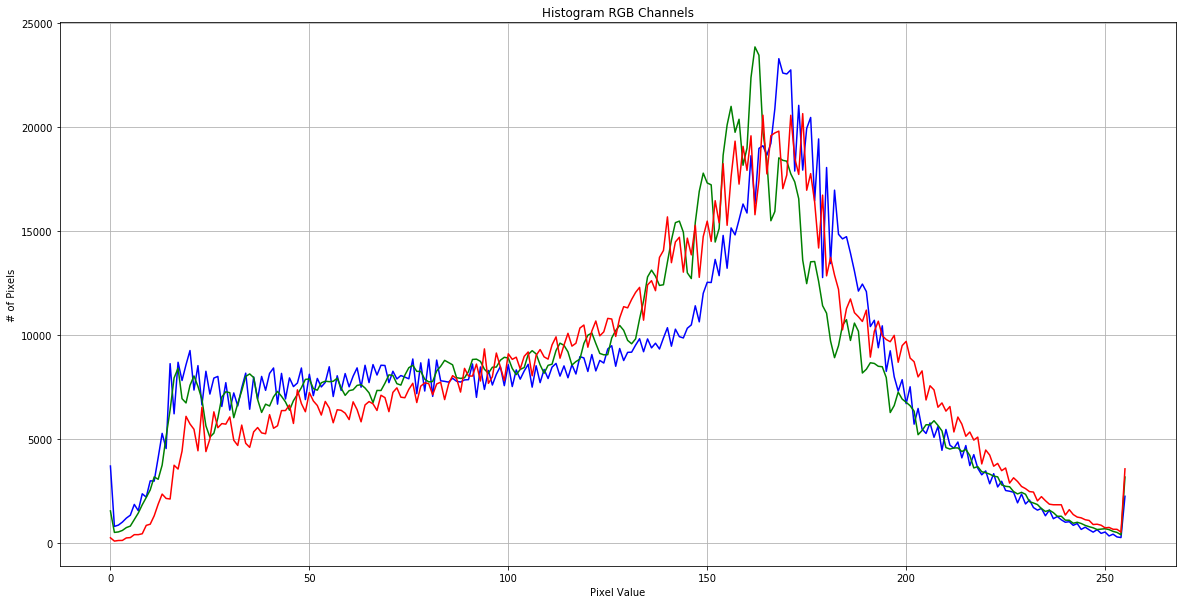

In [3]:
color = ('b','g','r')
for i,col in enumerate(color):
    hist = cv2.calcHist([img],[i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.xlabel('Pixel Value')
plt.ylabel('# of Pixels')
plt.title('Histogram RGB Channels')
plt.grid(True)
plt.show()

## Simple Binary Thresholding

In [4]:
@interact(thres=(1,255,2))
def thres(thres):
    img_blur = cv2.GaussianBlur(img_gray, (7,7), 0)
    ret,thresh1 = cv2.threshold(img_blur,thres,255,cv2.THRESH_BINARY)
        
    plt.subplot(121),plt.imshow(rgbImg),plt.title('Railway RGB')
    plt.subplot(122),plt.title('Threshold'),plt.imshow(thresh1,plt.get_cmap('gray'))
    plt.show()

interactive(children=(IntSlider(value=127, description='thres', max=255, min=1, step=2), Output()), _dom_class…

## Otsu Thresholding

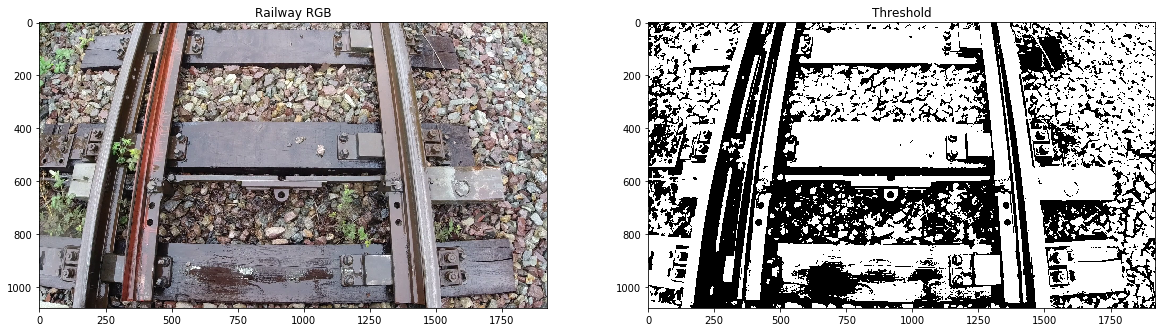

In [5]:
img_blur = cv2.GaussianBlur(img_gray, (7,7), 0)
ret,thresh1 = cv2.threshold(img_blur,161,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.subplot(121),plt.imshow(rgbImg),plt.title('Railway RGB')
plt.subplot(122),plt.title('Threshold'),plt.imshow(thresh1,plt.get_cmap('gray'))
plt.show()

## Manual Canny

In [6]:
@interact(low_thres=(1,250,2))
def thres(low_thres):
    img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
    edges = cv2.Canny(image=img_blur, threshold1=low_thres, threshold2=250) # Canny Edge Detection
    
    #plt.subplot(121),plt.imshow(img_gray,plt.get_cmap('gray')),plt.title('Railway Gray')
    #plt.subplot(122),
    plt.title('Railway Canny'),plt.imshow(edges,plt.get_cmap('gray'))
    plt.show()

interactive(children=(IntSlider(value=125, description='low_thres', max=250, min=1, step=2), Output()), _dom_c…

## Auto Canny

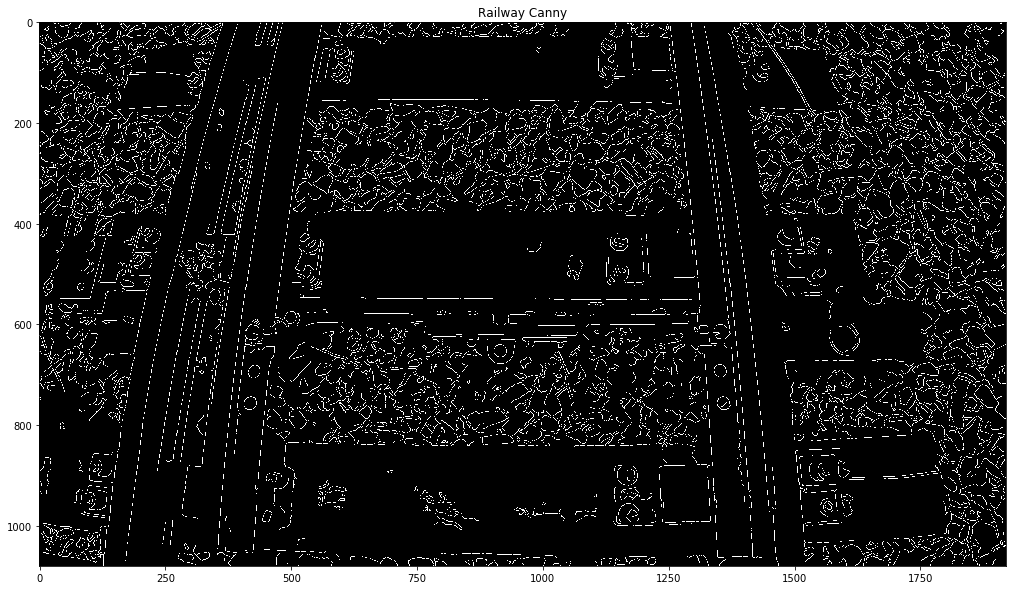

In [7]:
# https://pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/
sigma = 0.33

img_blur = cv2.GaussianBlur(img_gray, (9,9), 0)
#ret,thresh1 = cv2.threshold(img_blur,161,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
v = np.median(img_blur)

lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edged = cv2.Canny(img_blur, lower, upper)

#plt.subplot(121),plt.imshow(img_gray,plt.get_cmap('gray')),plt.title('Railway Gray')
#plt.subplot(122),
plt.title('Railway Canny'),plt.imshow(edged,plt.get_cmap('gray'))
plt.show()

## Probabilistic Hough Lines 

lines #: 3900


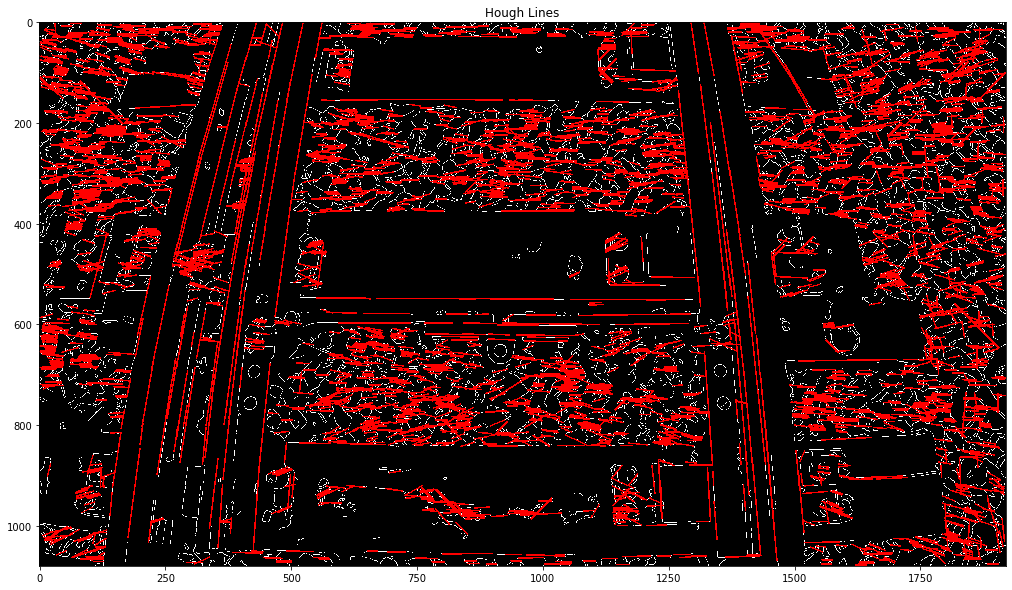

In [8]:
sigma = 0.33

img_blur = cv2.GaussianBlur(img_gray, (7,7), 0)
#ret,thresh1 = cv2.threshold(img_blur,161,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
v = np.median(img_blur)

lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edges = cv2.Canny(img_blur, lower, upper)
minLineLength = 20
maxLineGap = 10
lines = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=90, # Min number of votes for valid line
            minLineLength=minLineLength, # Min allowed length of line
            maxLineGap=maxLineGap # Max allowed gap between line for joining them
            )
blank_img = cv2.cvtColor(edges,cv2.COLOR_BGR2RGB) #color correction
print('lines #:', len(lines))
for i in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(blank_img,(x1,y1),(x2,y2),(255,0,0),2)
plt.title('Hough Lines'),plt.imshow(blank_img,plt.get_cmap('gray'))
plt.show()

## Vertical Hough Lines

lines #: 3900


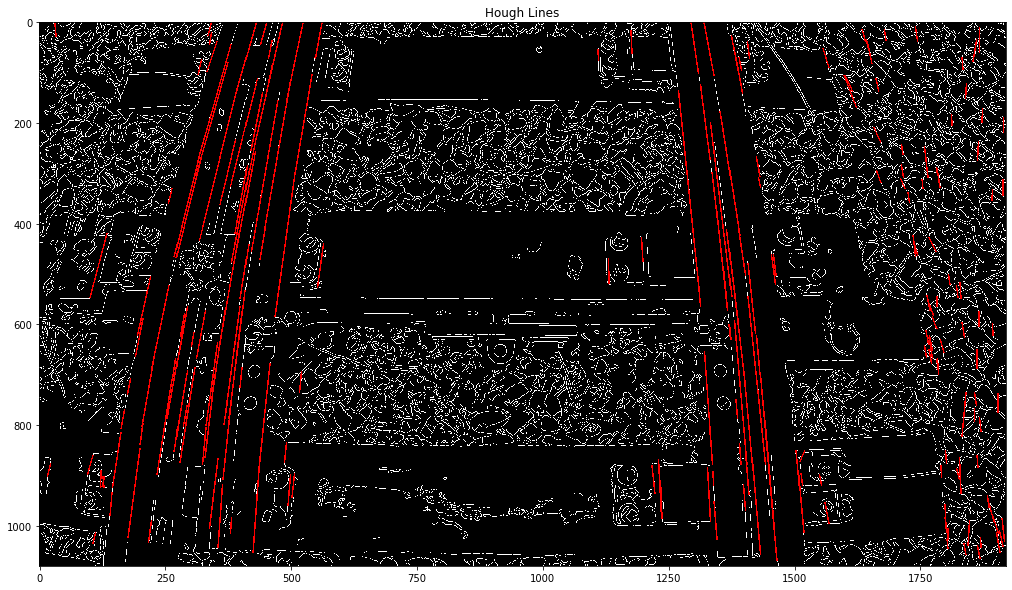

In [9]:
sigma = 0.33

img_blur = cv2.GaussianBlur(img_gray, (7,7), 0)
v = np.median(img_blur)

lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edges = cv2.Canny(img_blur, lower, upper)
minLineLength = 20
maxLineGap = 10
lines = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=90, # Min number of votes for valid line
            minLineLength=minLineLength, # Min allowed length of line
            maxLineGap=maxLineGap # Max allowed gap between line for joining them
            )
blank_img = cv2.cvtColor(edges,cv2.COLOR_BGR2RGB) #color correction
print('lines #:', len(lines))
for i in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        angle = np.arctan2(y2-y1, x2-x1)
        angle = np.absolute(angle)
        pi_half = np.pi/2
        pi_half_toleranz = pi_half*0.3
        if((pi_half - pi_half_toleranz) < angle and angle < (pi_half + pi_half_toleranz)):
            cv2.line(blank_img,(x1,y1),(x2,y2),(255,0,0),2)
plt.title('Hough Lines'),plt.imshow(blank_img,plt.get_cmap('gray'))
plt.show()

## Process Video with results